In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pyarrow.feather as feather

In [5]:
"""Train-Test Split (done once)"""
df = feather.read_feather('../data/raw/home_assignment.feather')
print(df.shape)
print("number of 'Fail' instances in dataset:", sum(df.TLJYWBE>1e-5))
df = df.drop_duplicates()
df = df.dropna(subset=['TLJYWBE'])

df, df_test, target, target_test = train_test_split(df, df['TLJYWBE'], test_size=0.2,
                                                    random_state=42)

df.to_feather('../data/raw/train_data.feather')
df_test.to_feather('../data/raw/test_data.feather')
print(df.shape)
print(df_test.shape)
print("Done")

(726288, 881)
number of 'Fail' instances in dataset: 64
(567614, 881)
(141904, 881)
Done


# EDA

In [6]:
file_path = '../data/raw/train_data.feather'
df = feather.read_feather(file_path)
print(df.shape)

(567614, 881)


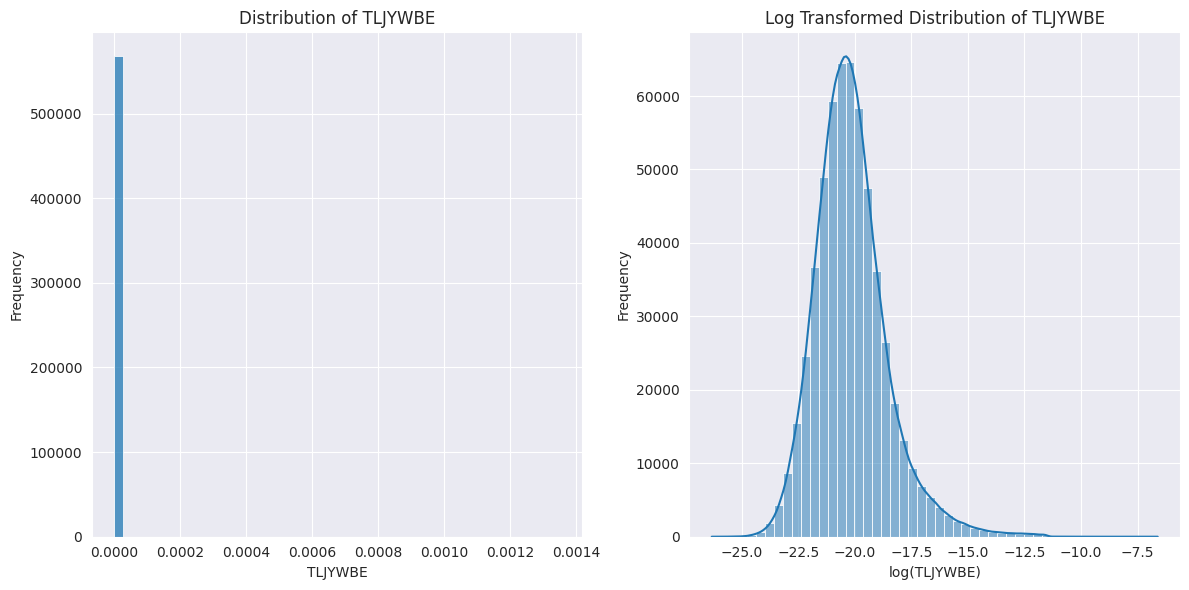

In [4]:
"""Observe label"""
# Log transformation to normalize distribution
df['log_TLJYWBE'] = np.log(df['TLJYWBE'])

# Analyze the distribution of 'TLJYWBE' and its log transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['TLJYWBE'].dropna(), bins=50)
plt.title('Distribution of TLJYWBE')
plt.xlabel('TLJYWBE')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['log_TLJYWBE'].dropna(), bins=50, kde=True)
plt.title('Log Transformed Distribution of TLJYWBE')
plt.xlabel('log(TLJYWBE)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
"""Calcualting the Z-score for the threshold after conversion to log scale"""

target_values = np.log(df['TLJYWBE'])
threshold = np.log(1e-5)
mean = target_values.mean()
std_dev = target_values.std()
threshold_z_core = (threshold - mean) / std_dev
print(f"The threshold Z-score is {threshold_z_core}")

The threshold Z-score is 5.342829376360196


In [5]:
# Display the first few rows of the dataframe
df.head(), df.info(), df.describe()

,HKTLMYY,IJEXXXL,KVNLYTZ,ADOIOYN,GPCKISJ,BFYTKKS,HNJMSWN,TDMCRGU,HNDGNRG,HFHITLP,...,BTEYMSX,TUIWOPA,LEVGOPF,BZRZXSR,AXVFXOV,SIJOOGR,BQLHRUO,HGWWOZY,TLJYWBE,log_TLJYWBE
count,726288.000000,209424.000000,209424.000000,209424.000000,209424.000000,209424.000000,209424.000000,209424.000000,209424.000000,209424.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.095180e+05,709518.000000
mean,4.500000,0.306278,0.379656,0.441864,0.493796,0.534841,0.563762,0.613557,0.640629,0.618447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.824341e-08,-20.139936
std,2.291289,0.030229,0.029145,0.030391,0.032272,0.034664,0.036421,0.037939,0.038930,0.032639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.976627e-06,1.614689
min,1.000000,0.056000,0.257000,0.315000,0.356000,0.304000,0.417000,0.442000,0.404000,0.406000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.693709e-12,-26.324390
25%,2.750000,0.285000,0.359000,0.420000,0.471000,0.510000,0.539000,0.587000,0.613000,0.596000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.252145e-10,-21.192926
50%,4.500000,0.307000,0.379000,0.441000,0.493000,0.534000,0.563000,0.613000,0.640000,0.618000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.531495e-09,-20.297022
75%,6.250000,0.327000,0.399000,0.462000,0.516000,0.559000,0.588000,0.639000,0.668000,0.641000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.078374e-09,-19.317568
max,8.000000,0.475000,0.622000,0.714000,0.754000,0.727000,0.739000,0.792000,0.805000,0.763000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.462833e-03,-6.006443


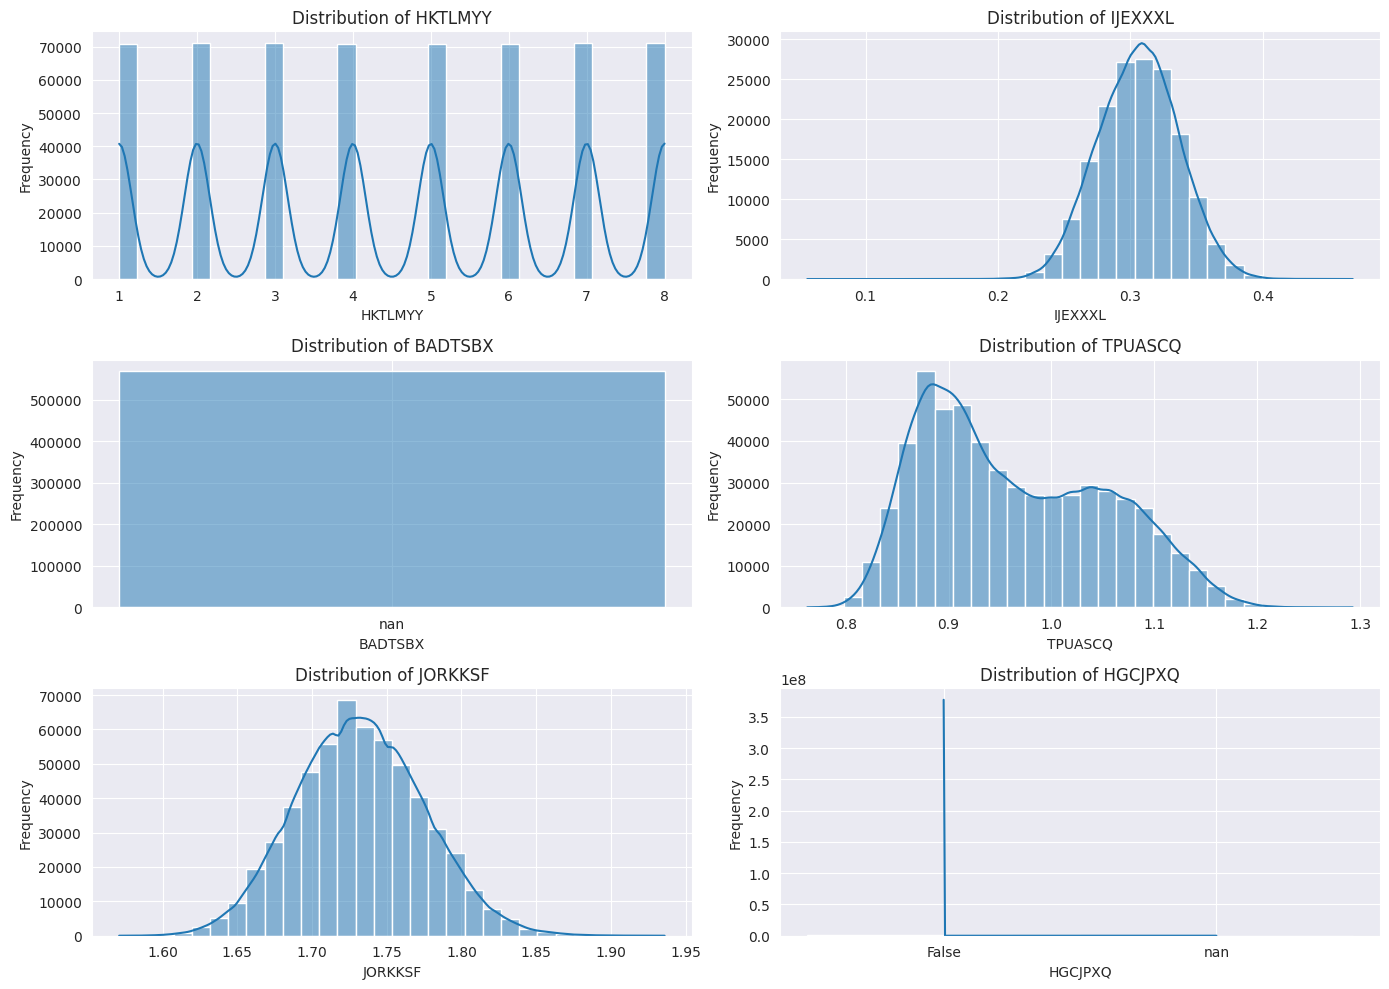

In [5]:
# Select a few columns for distribution visualization
columns_to_plot = ['HKTLMYY', 'IJEXXXL', 'BADTSBX', 'TPUASCQ', 'JORKKSF', 'HGCJPXQ']

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

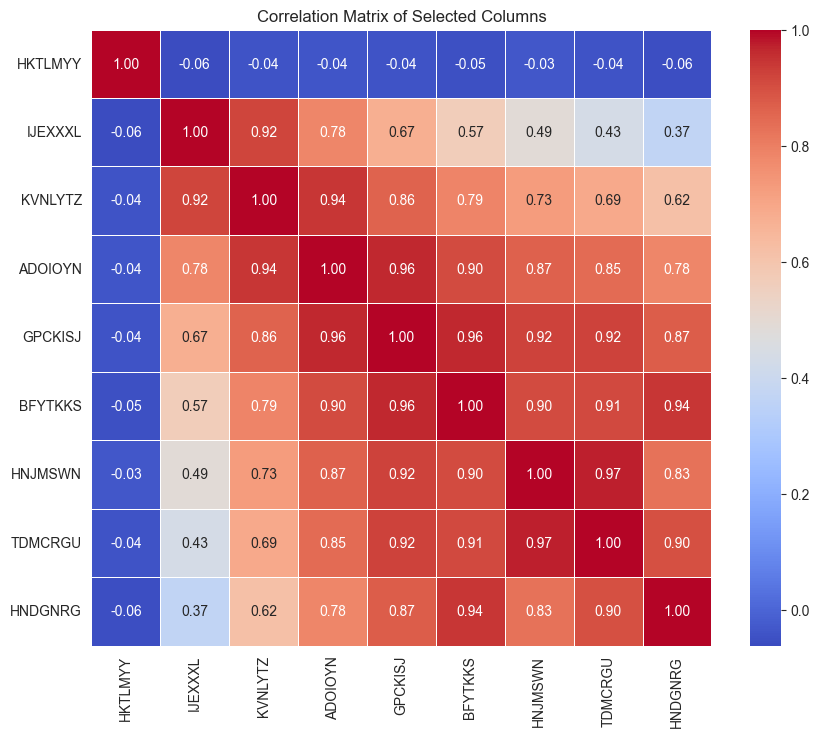

In [5]:
# Correlation matrix for the selected columns
selected_columns = ['HKTLMYY', 'IJEXXXL', 'KVNLYTZ', 'ADOIOYN', 'GPCKISJ', 'BFYTKKS', 'HNJMSWN',
                    'TDMCRGU', 'HNDGNRG']
correlation_matrix = df[selected_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Columns')
plt.show()

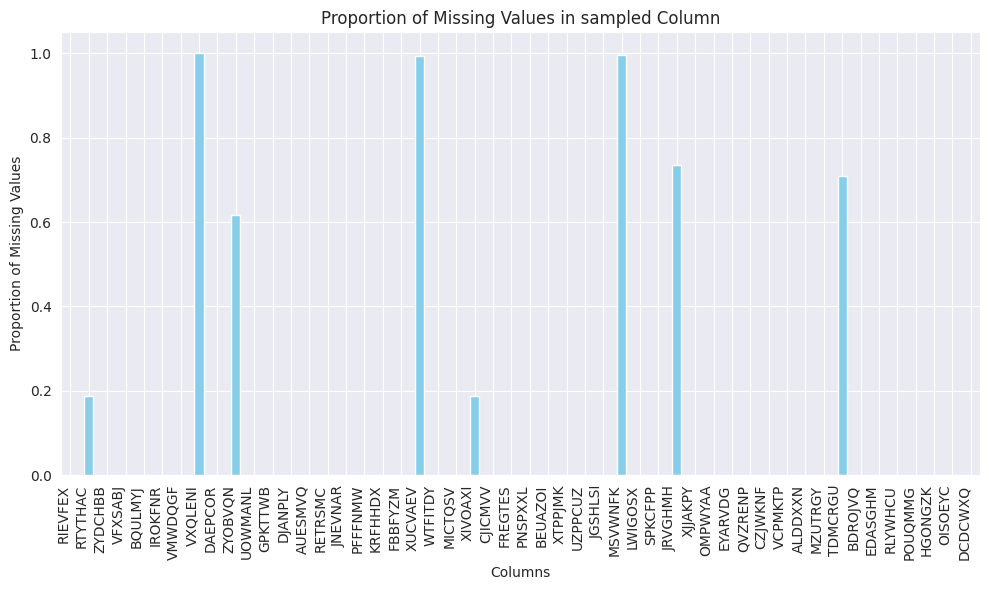

In [12]:
selected_columns = np.random.choice(df.columns, 50, replace=False)


missing_proportions = df[selected_columns].isnull().mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
missing_proportions.plot(kind='bar', color='skyblue')
plt.title('Proportion of Missing Values in sampled Column')
plt.xlabel('Columns')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()